# Get the image of a given row

In [4]:
import pandas as pd

df = pd.read_csv('../data/GalaxyZoo1_DR_table2.csv')

In [ ]:
import ipywidgets as widgets
from IPython.display import display

num_rows = df.shape[0]

input = widgets.BoundedIntText(
    value=12345,
    min=0,
    max=num_rows - 1,
    step=1,
    description='Row Number:',
)
display(input)


BoundedIntText(value=12345, description='Row Number:', max=667943)

In [42]:
rowNumber = input.value
print(f"Row number: {rowNumber}")

row = df.iloc[rowNumber]

coords = {'RA': row['RA'], 'DEC': row['DEC']}
coords

Row number: 999


{'RA': '00:06:07.78', 'DEC': '-10:25:17.3'}

In [43]:
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_str = coords['RA']
dec_str = coords['DEC']

coord = SkyCoord(ra_str, dec_str, unit=(u.hourangle, u.deg), frame="icrs")

degree_coords = {'RA': coord.ra.deg, 'DEC': coord.dec.deg}
degree_coords

{'RA': np.float64(1.5324166666666665), 'DEC': np.float64(-10.421472222222222)}

#### Get Image from SDSS API

In [44]:
import requests
from PIL import Image
from io import BytesIO

# API ref: https://skyserver.sdss.org/dr16/en/help/docs/api.aspx#imgcutout
path = 'https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg'
query = {
    'ra': degree_coords['RA'],
    'dec': degree_coords['DEC'],
    'scale': 0.1,
    'width': 220,
    'height': 220,
    'opt': ''
}

response = requests.get(path, params=query)

jpeg_image = Image.open(BytesIO(response.content))

#### Get Image from SkyView

In [ ]:
from astroquery.skyview import SkyView
import astropy.units as u
import logging
logging.basicConfig(level=logging.WARNING)

position = f"{degree_coords['RA']} {degree_coords['DEC']}"
print(f"Position: {position}")

images = SkyView.get_images(position=position, survey=['SDSSg'], height=0.005 * u.deg, width=0.005 * u.deg, pixels=2000)
print(f"Number of images: {len(images)}")

hdu_list = images[0]
image_hdu = hdu_list[0]
image_hdu

Position: 1.5324166666666665 -10.421472222222222
Number of images: 1


#### Draw Image from HDU

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     128   (2000, 2000)   float32   
None


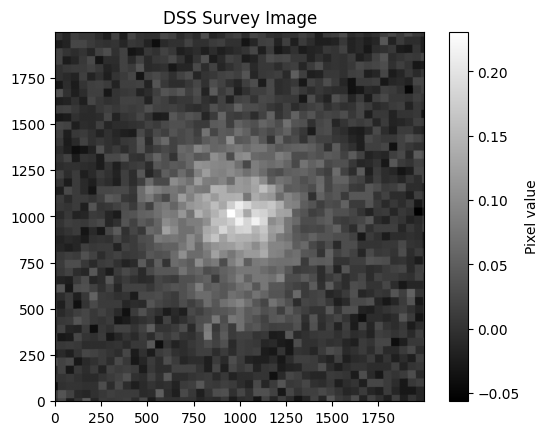

In [46]:
import matplotlib.pyplot as plt

data = image_hdu.data

print(hdu_list.info())

plt.imshow(data, cmap='gray', origin='lower')
plt.title("DSS Survey Image")
plt.colorbar(label='Pixel value')
plt.show()

#### Draw Image from SDSS Jpeg API

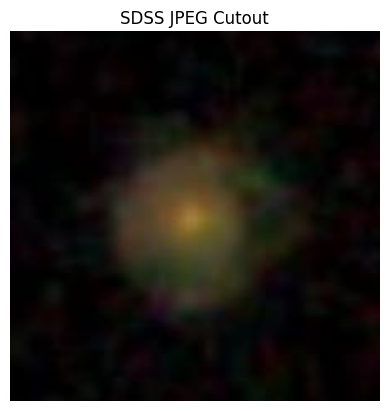

In [47]:
import matplotlib.pyplot as plt

plt.imshow(jpeg_image)
plt.axis("off")
plt.title("SDSS JPEG Cutout")
plt.show()